<a href="https://colab.research.google.com/github/tayfununal/hamiltonian/blob/main/stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tayfununal/hamiltonian.git

Cloning into 'hamiltonian'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 442 (delta 46), reused 22 (delta 22), pack-reused 379
Receiving objects: 100% (442/442), 8.53 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (279/279), done.


In [2]:
%run hamiltonian/symplectic_euler.ipynb
%run hamiltonian/hamiltonian.ipynb
%run hamiltonian/Lotka-Volterra_odeint.ipynb
%run hamiltonian/henon_heiles_symplectic_euler.ipynb
%run hamiltonian/henon_heils_hamiltonian.ipynb
%run hamiltonian/henon_heiles_odeint.ipynb
%run hamiltonian/non-linear_oscillator_odeint.ipynb
%run hamiltonian/henon_heiles_verlet.ipynb

In [ ]:
# --------------------------------------------------Harmonic Oscillator Example----------------------------------------------------
def ho_T(p):
    return (p**2)/2

def ho_V(q):
    return (q**2)/2

ho_model = Hamiltonian(solver=symplectic_euler(ho_T, ho_V, initial_point=[0.,1.], t_interval=[0,2*np.pi], h=20), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=1000)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 10ms/step - loss: 9.2068e-05
Epoch 1502/2000
1/1 [==============================] - 0s 13ms/step - loss: 9.1689e-05
Epoch 1503/2000
1/1 [==============================] - 0s 10ms/step - loss: 9.1320e-05
Epoch 1504/2000
1/1 [==============================] - 0s 10ms/step - loss: 9.0951e-05
Epoch 1505/2000
1/1 [==============================] - 0s 10ms/step - loss: 9.0577e-05
Epoch 1506/2000
1/1 [==============================] - 0s 10ms/step - loss: 9.0207e-05
Epoch 1507/2000
1/1 [==============================] - 0s 10ms/step - loss: 8.9845e-05
Epoch 1508/2000
1/1 [==============================] - 0s 14ms/step - loss: 8.9483e-05
Epoch 1509/2000
1/1 [==============================] - 0s 11ms/step - loss: 8.9117e-05
Epoch 1510/2000
1/1 [==============================] - 0s 9ms/step - loss: 8.8756e-05
Epoch 1511/2000
1/1 [==============================] - 0s 9ms/step - loss: 8.8400e-05
Epoch 1512/200

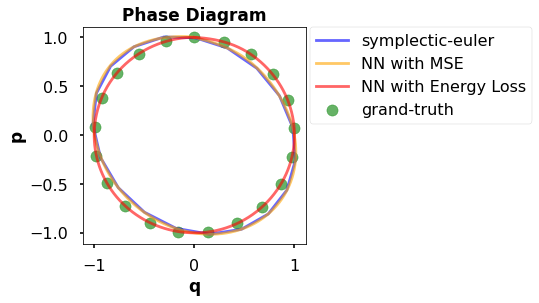

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

ho_test_t = np.linspace(0,2*np.pi,1000)
ho_prediction_energy = ho_model.energy_model_train(ho_test_t)
ho_prediction_mse = ho_model.model_train(ho_test_t)

# grand-truth
plt.scatter(tf.math.sin(np.arange(0.,2*np.pi,0.3)), tf.math.cos(np.arange(0.,2*np.pi,0.3)), c="green", alpha=0.6, label='grand-truth')
# symplectic euler
plt.plot(ho_model.z[:,0], ho_model.z[:,1], c="blue", alpha=0.6, label='symplectic-euler')
# NN with mse
plt.plot(ho_prediction_mse[:,0], ho_prediction_mse[:,1], c="orange", alpha=0.6, label='NN with MSE')
# NN with energy loss
plt.plot(ho_prediction_energy[:,0], ho_prediction_energy[:,1], c="red", alpha=0.6, label='NN with Energy Loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.05,1.036))

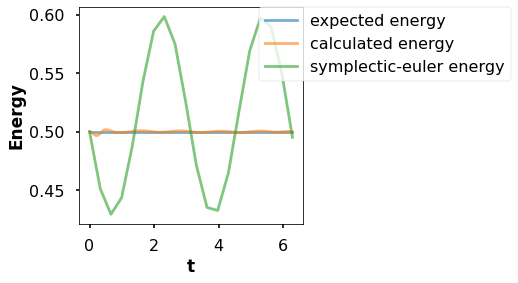

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17,fontweight="bold",fontname="Times New Roman")

ho_energy = [ho_model.H(ho_T, ho_V, 1.0, 0.0) for i in np.linspace(0.,2*np.pi,20)]
ho_energy_new = ho_model.H(ho_T, ho_V, ho_prediction_energy[:,0], ho_prediction_energy[:,1])
ho_symplectic_new = ho_model.H(ho_T, ho_V, ho_model.z[:,0], ho_model.z[:,1])

plt.plot(np.linspace(0.,2*np.pi,20), ho_energy, alpha=0.6, label='expected energy')
plt.plot(ho_test_t, ho_energy_new, alpha=0.6, label='calculated energy')
plt.plot(ho_model.t, ho_symplectic_new, alpha=0.6, label='symplectic-euler energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [ ]:
# --------------------------------------------------Non-Linear Oscillator Example----------------------------------------------------

def non_os_T(p):
  return (p**2)/2

def non_os_V(q):
  return ((q**2)/2) + ((q**4)/4)

non_os_model = Hamiltonian(solver=symplectic_euler(non_os_T, non_os_V, initial_point=[1.3, 1.0], t_interval=[0., 4*np.math.pi], h=50), input_dim=1, output_dim=2,
              hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000, 
              batch_size=100000000, learning_rate=0.0002, h_for_t_created=1000)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 1502/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 1503/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 1504/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0076
Epoch 1505/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 1506/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 1507/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 1508/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0076
Epoch 1509/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 1510/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 1511/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 1512/2000
1/1 [==============================] - 0s 1

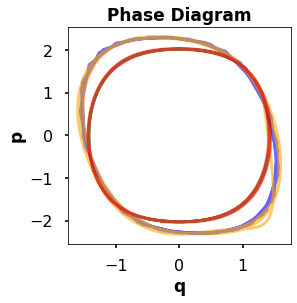

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('q', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('p', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

non_os_test_t = np.linspace(0., 4*np.math.pi, 1000)
non_os_prediction_energy = non_os_model.energy_model_train(non_os_test_t)
non_os_prediction_mse = non_os_model.model_train(non_os_test_t)

# grand-truth
non_os_odeint_result = non_os_odeint(np.array([1.3,1.0]), t=np.arange(0., 4*np.pi, 0.01))
plt.plot(non_os_odeint_result[:,0], non_os_odeint_result[:,1], c="green", alpha=0.6)

# symplectic euler
plt.plot(non_os_model.z[:,0], non_os_model.z[:,1], c ="blue", alpha=0.6)
# NN with mse
plt.plot(non_os_prediction_mse[:,0], non_os_prediction_mse[:,1], c ="orange", alpha=0.6)
# NN with energy loss
plt.plot(non_os_prediction_energy[:,0], non_os_prediction_energy[:,1], c="red", alpha=0.6)

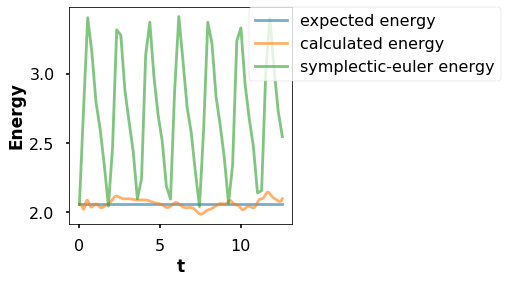

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

non_energy = [non_os_model.H(non_os_T, non_os_V, 1.3, 1.0) for i in np.linspace(0., 4 * np.pi, 100)]
non_energy_new = non_os_model.H(non_os_T, non_os_V, non_os_prediction_energy[:,0], non_os_prediction_energy[:,1])
non_symplectic_new = non_os_model.H(non_os_T, non_os_V, non_os_model.z[:,0], non_os_model.z[:,1])

plt.plot(np.linspace(0., 4 * np.pi, 100), non_energy, alpha=0.6, label='expected energy')
plt.plot(non_os_test_t, non_energy_new, alpha=0.6, label='calculated energy')
plt.plot(non_os_model.t, non_symplectic_new, alpha=0.6, label='symplectic-euler energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [ ]:
# --------------------------------------------------Lotka-Volterra Example----------------------------------------------------

# α = 2/3, β = 4/3, γ = 1 = δ. Assume x, y quantify thousands each. Circles represent prey and predator initial conditions from x = y = 0.9 to 1.8, in steps of 0.1. The fixed point is at (1, 1/2).
# q = ln(y), p = ln(x) 

def lv_T(p):
  return tf.math.exp(p) - p

def lv_V(q):
  return (4/3) * tf.math.exp(q) - (2/3) * q

lv_model = Hamiltonian(solver=symplectic_euler(lv_T, lv_V, initial_point=[-0.105, -0.105], t_interval=[0, 50], h=50), input_dim=1, output_dim=2,
            hidden_layer=20, each_neuron=64, activation_func=tf.math.sin, epoch=2000 ,batch_size=100000000, learning_rate=0.0002, h_for_t_created=1000)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 18ms/step - loss: 1.0164e-04
Epoch 1502/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.6148e-04
Epoch 1503/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.4676e-04
Epoch 1504/2000
1/1 [==============================] - 0s 17ms/step - loss: 7.9007e-05
Epoch 1505/2000
1/1 [==============================] - 0s 13ms/step - loss: 4.6544e-05
Epoch 1506/2000
1/1 [==============================] - 0s 10ms/step - loss: 7.0112e-05
Epoch 1507/2000
1/1 [==============================] - 0s 12ms/step - loss: 9.1562e-05
Epoch 1508/2000
1/1 [==============================] - 0s 13ms/step - loss: 7.3889e-05
Epoch 1509/2000
1/1 [==============================] - 0s 12ms/step - loss: 4.7238e-05
Epoch 1510/2000
1/1 [==============================] - 0s 11ms/step - loss: 5.2125e-05
Epoch 1511/2000
1/1 [==============================] - 0s 9ms/step - loss: 7.4195e-05
Epoch 1512/20

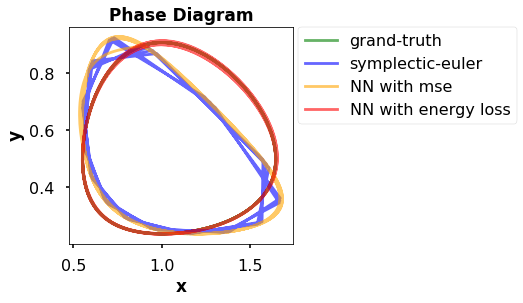

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('x', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('y', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

lv_test_t = np.linspace(0, 50, 1000)
lv_prediction_energy = lv_model.energy_model_train(lv_test_t)
lv_prediction_mse = lv_model.model_train(lv_test_t)

# grand-truth
x, y = lotka_volterra(alpha=2/3, beta=4/3, delta=1., gamma=1., x0=0.9, y0=0.9, t_interval=[0,50], h=500)
plt.plot(x, y, c ="green", alpha=0.6, label='grand-truth')
# symplectic euler
plt.plot(np.exp(lv_model.z[:,1]), np.exp(lv_model.z[:,0]), c ="blue", alpha=0.6, label='symplectic-euler')
# NN with mse
plt.plot(np.exp(lv_prediction_mse[:,1]), np.exp(lv_prediction_mse[:,0]), c ="orange", alpha=0.6, label='NN with mse')
# NN with energy loss
plt.plot(np.exp(lv_prediction_energy[:,1]), np.exp(lv_prediction_energy[:,0]), c="red", alpha=0.6, label='NN with energy loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.04, 1.036))

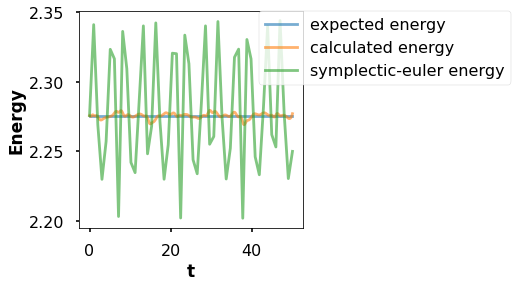

In [ ]:
plt.figure(figsize = (4, 4))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

lv_energy = [lv_model.H(lv_T, lv_V, -0.105, -0.105) for i in np.linspace(0., 50., 51)]
lv_energy_new = lv_model.H(lv_T, lv_V, lv_prediction_energy[:,0], lv_prediction_energy[:,1])
lv_symplectic_new = lv_model.H(lv_T, lv_V, lv_model.z[:,0], lv_model.z[:,1])

plt.plot(np.linspace(0., 50.0, 51), lv_energy, alpha=0.6, label='expected energy')
plt.plot(lv_test_t, lv_energy_new, alpha=0.6, label='calculated energy')
plt.plot(lv_model.t, lv_symplectic_new, alpha=0.6, label='symplectic-euler energy')
plt.legend(loc='upper right', bbox_to_anchor=(1.97, 1.036))

In [9]:
# --------------------------------------------------Henon Heiles Example----------------------------------------------------
# For Symplecti Euler
"""
def hh_T(px, py):
  return 0.5*(px**2 + py**2)

def hh_V(x, y):
  return 0.5*(x**2 + y**2) + ((x**2)*y - (y**3)/3)
"""
# For Verlet
def hh_T(p):
  return 0.5*(p[0]**2 + p[1]**2)

def hh_V(x):
  return 0.5*(x[0]**2 + x[1]**2) + ((x[0]**2)*x[1] - (x[1]**3)/3)

hh_model = hh_Hamiltonian(solver=henon_heiles_verlet(hh_T, hh_V, initial_point=[0.3, -0.3, 0.3, 0.15], t_interval=[0., 6*np.math.pi], h=50),
                          input_dim=1, output_dim=4, hidden_layer=25, each_neuron=64, activation_func=tf.math.tanh, epoch=10000, batch_size=10000000000, 
                          learning_rate=0.0001, h_for_t_created=10000)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 14ms/step - loss: 5.5749e-07
Epoch 7502/10000
1/1 [==============================] - 0s 16ms/step - loss: 4.6317e-07
Epoch 7503/10000
1/1 [==============================] - 0s 16ms/step - loss: 5.7976e-07
Epoch 7504/10000
1/1 [==============================] - 0s 16ms/step - loss: 8.2746e-07
Epoch 7505/10000
1/1 [==============================] - 0s 15ms/step - loss: 9.4922e-07
Epoch 7506/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.0774e-06
Epoch 7507/10000
1/1 [==============================] - 0s 15ms/step - loss: 1.1298e-06
Epoch 7508/10000
1/1 [==============================] - 0s 16ms/step - loss: 1.4690e-06
Epoch 7509/10000
1/1 [==============================] - 0s 20ms/step - loss: 1.8409e-06
Epoch 7510/10000
1/1 [==============================] - 0s 14ms/step - loss: 2.2264e-06
Epoch 7511/10000
1/1 [==============================] - 0s 20ms/step - loss: 2.3996e-06
Ep

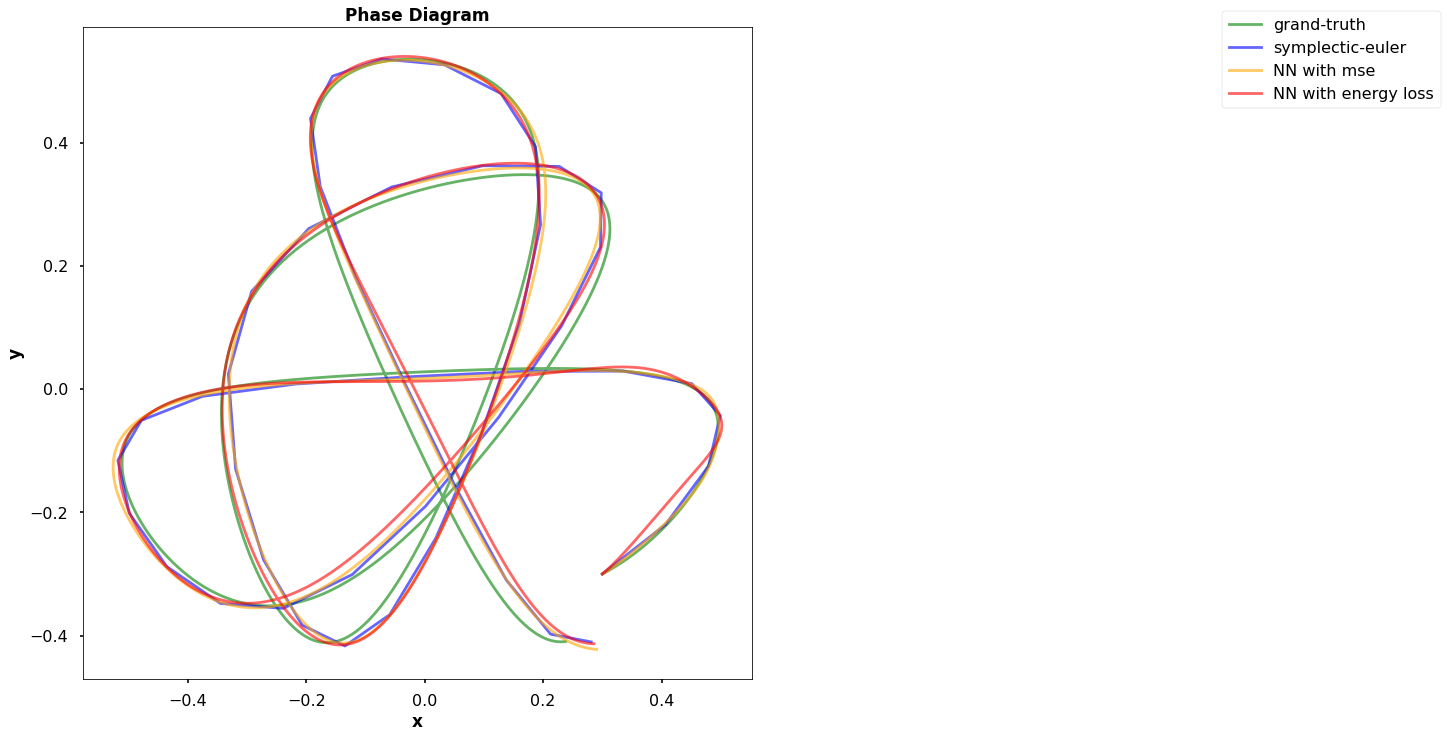

In [10]:
plt.figure(figsize = (12, 12))
plt.xlabel('x', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.ylabel('y', fontsize=17,fontweight="bold",fontname="Times New Roman")
plt.title("Phase Diagram", fontsize=17,fontweight="bold",fontname="Times New Roman")

hh_test_t = np.linspace(0, 6*np.math.pi, 10000)
hh_prediction_energy = hh_model.energy_model_train(hh_test_t)
hh_prediction_mse = hh_model.model_train(hh_test_t)

# grand-truth
hh_result = hh_odeint(initial_point=[0.3, -0.3, 0.3, 0.15], t=[0., 6*np.math.pi], h=1500)
plt.plot(hh_result[:,0], hh_result[:,1], c ="green", alpha=0.6, label='grand-truth')

# symplectic euler
plt.plot(hh_model.z_0[:,0], hh_model.z_0[:,1], c ="blue", alpha=0.6, label='symplectic-euler')

# NN with mse
plt.plot(hh_prediction_mse[:,0], hh_prediction_mse[:,1], c ="orange", alpha=0.6, label='NN with mse')

# NN with energy loss
plt.plot(hh_prediction_energy[:,0], hh_prediction_energy[:,1], c="red", alpha=0.6, label='NN with energy loss')
plt.legend(loc='upper right', bbox_to_anchor=(2.04, 1.036))

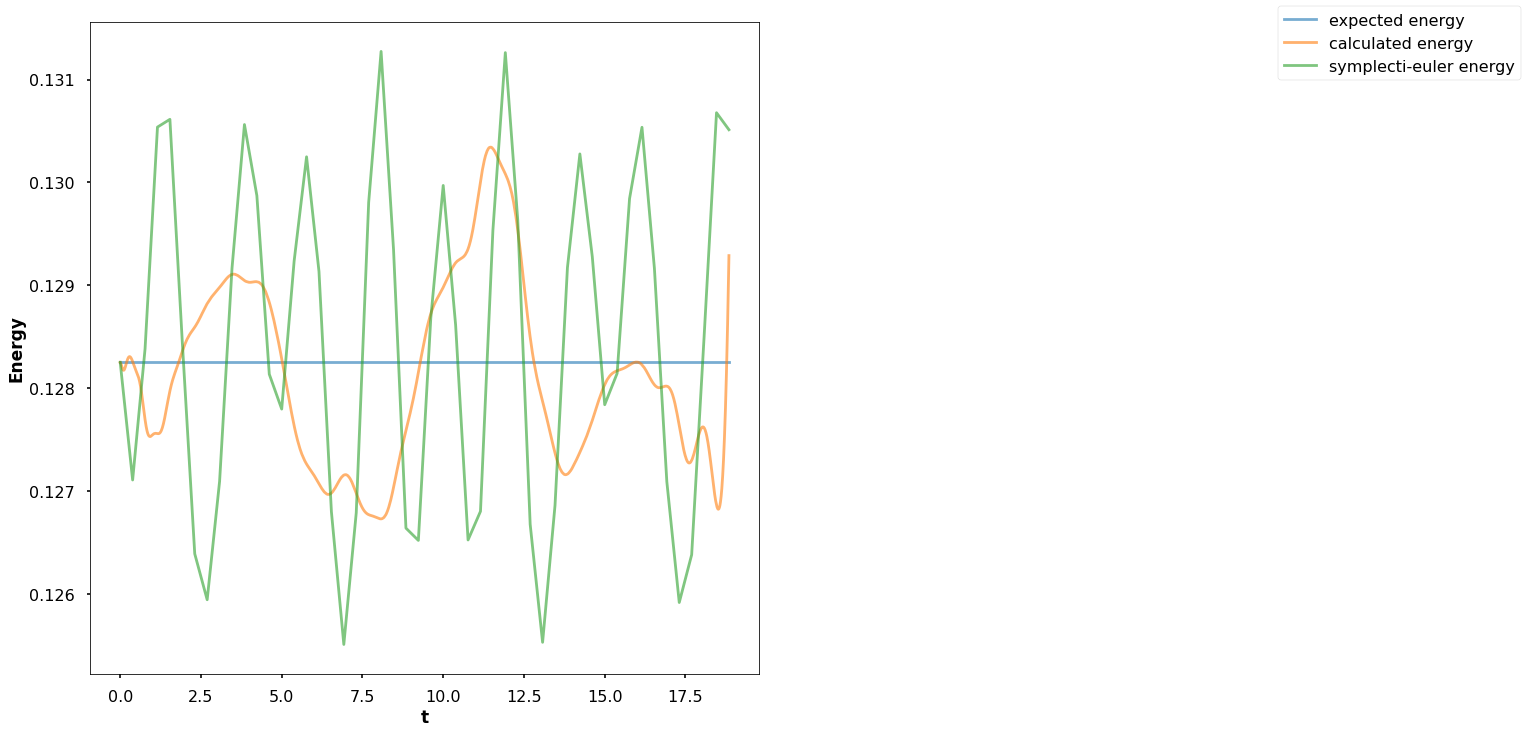

In [11]:
plt.figure(figsize = (12, 12))
plt.xlabel('t', fontsize=17, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Energy', fontsize=17, fontweight="bold", fontname="Times New Roman")

hh_energy = [hh_model.H(hh_T, hh_V, 0.3, -0.3, 0.3, 0.15) for i in np.linspace(0., 6*np.math.pi, 100)]
hh_energy_new = hh_model.H(hh_T, hh_V, hh_prediction_energy[:,0], hh_prediction_energy[:,1], hh_prediction_energy[:,2], hh_prediction_energy[:,3])
hh_symplectic_new = hh_model.H(hh_T, hh_V, hh_model.z[:,0], hh_model.z[:,1], hh_model.z[:,2], hh_model.z[:,3])

plt.plot(np.linspace(0., 6*np.math.pi, 100), hh_energy, alpha=0.6, label='expected energy')
plt.plot(hh_test_t, hh_energy_new, alpha=0.6, label='calculated energy')
plt.plot(hh_model.t, hh_symplectic_new, alpha=0.6, label='symplecti-euler energy')
plt.legend(loc='upper right', bbox_to_anchor=(2.15, 1.036))